In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
# from datetime import date
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("trial_sample_dataset.csv");

In [4]:
df.shape

(2286, 8)

In [5]:
df.head()

,Asset,Options,Opening_Quote,Closing_Quote,Trade_USD,Income_USD,Profit_Loss,Status
0,EUR USD,82%,1.17280\n02 October 2020 17:39:55,1.17285\n02 October 2020 17:40:55,1,1.82,0.82,Profit
1,Ethereum Classic,80%,5.08511\n02 October 2020 17:25:47,5.08660\n02 October 2020 17:26:34,1,1.05,0.05,Profit
2,Ethereum Classic,80%,5.08305\n02 October 2020 15:15:59,5.08845\n02 October 2020 15:30:59,2,3.60,1.60,Profit
3,Zcash,80%,64.50559\n02 October 2020 01:42:38,64.49942\n02 October 2020 01:43:38,1,1.80,0.80,Profit
4,Zcash,80%,64.67999\n02 October 2020 01:38:50,64.72243\n02 October 2020 01:38:56,1,1.41,0.41,Profit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 8 columns):
Asset            2286 non-null object
Options          2286 non-null object
Opening_Quote    2286 non-null object
Closing_Quote    2286 non-null object
Trade_USD        2286 non-null int64
Income_USD       2286 non-null float64
Profit_Loss      2286 non-null float64
Status           2286 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 143.0+ KB


In [7]:
df.tail()

,Asset,Options,Opening_Quote,Closing_Quote,Trade_USD,Income_USD,Profit_Loss,Status
2281,Ethereum Classic,0.8,3.82741\n23 November 2019 14:16:43,3.83066\n23 November 2019 14:25:43,10,18.0,8.0,Profit
2282,Ethereum Classic,0.8,3.86514\n23 November 2019 13:40:50,3.86305\n23 November 2019 13:49:50,6,10.8,4.8,Profit
2283,Ethereum Classic,0.8,3.82321\n23 November 2019 12:59:41,3.85393\n23 November 2019 13:08:41,4,7.2,3.2,Profit
2284,Ethereum Classic,0.8,3.87457\n23 November 2019 12:34:19,3.87024\n23 November 2019 12:43:19,3,5.4,2.4,Profit
2285,Ethereum Classic,0.8,3.86811\n23 November 2019 12:04:25,3.86684\n23 November 2019 12:13:25,3,5.4,2.4,Profit


In [8]:
df[["Opening_Quote_USD", "Opening_Quote_Time"]] = df.Opening_Quote.str.split("\n", expand = True)

In [9]:
df[["Closing_Quote_USD", "Closing_Quote_Time"]] = df.Closing_Quote.str.split("\n", expand = True)

In [10]:
df.tail()

,Asset,Options,Opening_Quote,Closing_Quote,Trade_USD,Income_USD,Profit_Loss,Status,Opening_Quote_USD,Opening_Quote_Time,Closing_Quote_USD,Closing_Quote_Time
2281,Ethereum Classic,0.8,3.82741\n23 November 2019 14:16:43,3.83066\n23 November 2019 14:25:43,10,18.0,8.0,Profit,3.82741,23 November 2019 14:16:43,3.83066,23 November 2019 14:25:43
2282,Ethereum Classic,0.8,3.86514\n23 November 2019 13:40:50,3.86305\n23 November 2019 13:49:50,6,10.8,4.8,Profit,3.86514,23 November 2019 13:40:50,3.86305,23 November 2019 13:49:50
2283,Ethereum Classic,0.8,3.82321\n23 November 2019 12:59:41,3.85393\n23 November 2019 13:08:41,4,7.2,3.2,Profit,3.82321,23 November 2019 12:59:41,3.85393,23 November 2019 13:08:41
2284,Ethereum Classic,0.8,3.87457\n23 November 2019 12:34:19,3.87024\n23 November 2019 12:43:19,3,5.4,2.4,Profit,3.87457,23 November 2019 12:34:19,3.87024,23 November 2019 12:43:19
2285,Ethereum Classic,0.8,3.86811\n23 November 2019 12:04:25,3.86684\n23 November 2019 12:13:25,3,5.4,2.4,Profit,3.86811,23 November 2019 12:04:25,3.86684,23 November 2019 12:13:25


In [11]:
df.head()

,Asset,Options,Opening_Quote,Closing_Quote,Trade_USD,Income_USD,Profit_Loss,Status,Opening_Quote_USD,Opening_Quote_Time,Closing_Quote_USD,Closing_Quote_Time
0,EUR USD,82%,1.17280\n02 October 2020 17:39:55,1.17285\n02 October 2020 17:40:55,1,1.82,0.82,Profit,1.17280,02 October 2020 17:39:55,1.17285,02 October 2020 17:40:55
1,Ethereum Classic,80%,5.08511\n02 October 2020 17:25:47,5.08660\n02 October 2020 17:26:34,1,1.05,0.05,Profit,5.08511,02 October 2020 17:25:47,5.08660,02 October 2020 17:26:34
2,Ethereum Classic,80%,5.08305\n02 October 2020 15:15:59,5.08845\n02 October 2020 15:30:59,2,3.60,1.60,Profit,5.08305,02 October 2020 15:15:59,5.08845,02 October 2020 15:30:59
3,Zcash,80%,64.50559\n02 October 2020 01:42:38,64.49942\n02 October 2020 01:43:38,1,1.80,0.80,Profit,64.50559,02 October 2020 01:42:38,64.49942,02 October 2020 01:43:38
4,Zcash,80%,64.67999\n02 October 2020 01:38:50,64.72243\n02 October 2020 01:38:56,1,1.41,0.41,Profit,64.67999,02 October 2020 01:38:50,64.72243,02 October 2020 01:38:56


In [12]:
df.drop(columns=['Opening_Quote', 'Closing_Quote'], inplace = True)

In [13]:
df.columns

Index(['Asset', 'Options', 'Trade_USD', 'Income_USD', 'Profit_Loss', 'Status',
       'Opening_Quote_USD', 'Opening_Quote_Time', 'Closing_Quote_USD',
       'Closing_Quote_Time'],
      dtype='object')

In [14]:
df = df[['Asset', 'Options', 'Opening_Quote_USD', 'Opening_Quote_Time', 'Closing_Quote_USD', 'Closing_Quote_Time', 'Trade_USD', 'Income_USD', 'Profit_Loss', 'Status']]

In [15]:
df

,Asset,Options,Opening_Quote_USD,Opening_Quote_Time,Closing_Quote_USD,Closing_Quote_Time,Trade_USD,Income_USD,Profit_Loss,Status
0,EUR USD,82%,1.17280,02 October 2020 17:39:55,1.17285,02 October 2020 17:40:55,1,1.82,0.82,Profit
1,Ethereum Classic,80%,5.08511,02 October 2020 17:25:47,5.08660,02 October 2020 17:26:34,1,1.05,0.05,Profit
2,Ethereum Classic,80%,5.08305,02 October 2020 15:15:59,5.08845,02 October 2020 15:30:59,2,3.60,1.60,Profit
3,Zcash,80%,64.50559,02 October 2020 01:42:38,64.49942,02 October 2020 01:43:38,1,1.80,0.80,Profit
4,Zcash,80%,64.67999,02 October 2020 01:38:50,64.72243,02 October 2020 01:38:56,1,1.41,0.41,Profit
...,...,...,...,...,...,...,...,...,...,...
2281,Ethereum Classic,0.8,3.82741,23 November 2019 14:16:43,3.83066,23 November 2019 14:25:43,10,18.00,8.00,Profit
2282,Ethereum Classic,0.8,3.86514,23 November 2019 13:40:50,3.86305,23 November 2019 13:49:50,6,10.80,4.80,Profit
2283,Ethereum Classic,0.8,3.82321,23 November 2019 12:59:41,3.85393,23 November 2019 13:08:41,4,7.20,3.20,Profit
2284,Ethereum Classic,0.8,3.87457,23 November 2019 12:34:19,3.87024,23 November 2019 12:43:19,3,5.40,2.40,Profit


In [16]:
df.Options.unique()

array(['82%', '80%', '32%', '71%', '77%', '78%', '79%', '70%', '76%',
       '75%', '66%', '67%', '84%', '0.84', '0.82', '0.8', '0.7', '0.6',
       '0.73', '0.48', '0.79', '0.77', '0.63', '0.74', '1', '0.65',
       '0.99', '0.55', '0.51', '0.62', '0.2', '0.76', '0.75', '0.5',
       '0.42', '0.43', '0.22', '0.4', '0.46', '0.54', '0.71', '0.1',
       '0.32', '0.49', '0.72', '0.78', '0.98', '0.25', '0.35', '0.19',
       '0.26', '0.64', '0.61', '0.85', '0.68', '0.3', '0.92', '0.91',
       '0.88', '0.81', '0.12', '0.9', '0.87', '0.67', '0.56', '0.38',
       '0.69', '0.33', '0.31', '0.57', '0.58', '0.44', '0.53', '0.66',
       '0.52', '0.41', '0.45'], dtype=object)

In [17]:
df.Options = df.Options.str.replace('%', '')

In [18]:
df.Options = df.Options.astype(float)

In [19]:
df.Options.unique()

array([82.  , 80.  , 32.  , 71.  , 77.  , 78.  , 79.  , 70.  , 76.  ,
       75.  , 66.  , 67.  , 84.  ,  0.84,  0.82,  0.8 ,  0.7 ,  0.6 ,
        0.73,  0.48,  0.79,  0.77,  0.63,  0.74,  1.  ,  0.65,  0.99,
        0.55,  0.51,  0.62,  0.2 ,  0.76,  0.75,  0.5 ,  0.42,  0.43,
        0.22,  0.4 ,  0.46,  0.54,  0.71,  0.1 ,  0.32,  0.49,  0.72,
        0.78,  0.98,  0.25,  0.35,  0.19,  0.26,  0.64,  0.61,  0.85,
        0.68,  0.3 ,  0.92,  0.91,  0.88,  0.81,  0.12,  0.9 ,  0.87,
        0.67,  0.56,  0.38,  0.69,  0.33,  0.31,  0.57,  0.58,  0.44,
        0.53,  0.66,  0.52,  0.41,  0.45])

In [20]:
df.Options.unique()

array([82.  , 80.  , 32.  , 71.  , 77.  , 78.  , 79.  , 70.  , 76.  ,
       75.  , 66.  , 67.  , 84.  ,  0.84,  0.82,  0.8 ,  0.7 ,  0.6 ,
        0.73,  0.48,  0.79,  0.77,  0.63,  0.74,  1.  ,  0.65,  0.99,
        0.55,  0.51,  0.62,  0.2 ,  0.76,  0.75,  0.5 ,  0.42,  0.43,
        0.22,  0.4 ,  0.46,  0.54,  0.71,  0.1 ,  0.32,  0.49,  0.72,
        0.78,  0.98,  0.25,  0.35,  0.19,  0.26,  0.64,  0.61,  0.85,
        0.68,  0.3 ,  0.92,  0.91,  0.88,  0.81,  0.12,  0.9 ,  0.87,
        0.67,  0.56,  0.38,  0.69,  0.33,  0.31,  0.57,  0.58,  0.44,
        0.53,  0.66,  0.52,  0.41,  0.45])

In [21]:
df.Options.mask(df.Options <= 1.0, (100 * df.Options), inplace = True)

In [22]:
df.Options.unique()

array([ 82.,  80.,  32.,  71.,  77.,  78.,  79.,  70.,  76.,  75.,  66.,
        67.,  84.,  60.,  73.,  48.,  63.,  74., 100.,  65.,  99.,  55.,
        51.,  62.,  20.,  50.,  42.,  43.,  22.,  40.,  46.,  54.,  10.,
        49.,  72.,  98.,  25.,  35.,  19.,  26.,  64.,  61.,  85.,  68.,
        30.,  92.,  91.,  88.,  81.,  12.,  90.,  87.,  56.,  38.,  69.,
        33.,  31.,  57.,  58.,  44.,  53.,  52.,  41.,  45.])

In [23]:
# df.Options = df.Options.astype(int)

In [24]:
# df.Options.unique()

In [25]:
df.Opening_Quote_USD = df.Opening_Quote_USD.astype(float)

In [26]:
df.Closing_Quote_USD = df.Closing_Quote_USD.astype(float)

In [27]:
df.head()

,Asset,Options,Opening_Quote_USD,Opening_Quote_Time,Closing_Quote_USD,Closing_Quote_Time,Trade_USD,Income_USD,Profit_Loss,Status
0,EUR USD,82.0,1.17280,02 October 2020 17:39:55,1.17285,02 October 2020 17:40:55,1,1.82,0.82,Profit
1,Ethereum Classic,80.0,5.08511,02 October 2020 17:25:47,5.08660,02 October 2020 17:26:34,1,1.05,0.05,Profit
2,Ethereum Classic,80.0,5.08305,02 October 2020 15:15:59,5.08845,02 October 2020 15:30:59,2,3.60,1.60,Profit
3,Zcash,80.0,64.50559,02 October 2020 01:42:38,64.49942,02 October 2020 01:43:38,1,1.80,0.80,Profit
4,Zcash,80.0,64.67999,02 October 2020 01:38:50,64.72243,02 October 2020 01:38:56,1,1.41,0.41,Profit


In [28]:
newDate = datetime.strptime(df.Opening_Quote_Time[0], '%d %B %Y %H:%M:%S') #Date to be converted: 02 October 2020 17:39:55	

In [29]:
# for python datetime refer bookmarked: https://www.w3schools.com/python/python_datetime.asp

In [30]:
newDate

datetime.datetime(2020, 10, 2, 17, 39, 55)

In [31]:
# There are two ways to convert string to datetime type
# df['Date']= pd.to_datetime(df['Date']) 
# df['Date'] = df['Date'].astype('datetime64[ns]') 

In [32]:
df.Opening_Quote_Time = pd.to_datetime(df.Opening_Quote_Time)
df.Closing_Quote_Time = pd.to_datetime(df.Closing_Quote_Time)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 10 columns):
Asset                 2286 non-null object
Options               2286 non-null float64
Opening_Quote_USD     2286 non-null float64
Opening_Quote_Time    2286 non-null datetime64[ns]
Closing_Quote_USD     2286 non-null float64
Closing_Quote_Time    2286 non-null datetime64[ns]
Trade_USD             2286 non-null int64
Income_USD            2286 non-null float64
Profit_Loss           2286 non-null float64
Status                2286 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 178.7+ KB


In [34]:
df.Status.value_counts(normalize=True) * 100

Profit    51.443570
Loss      45.625547
Void       2.930884
Name: Status, dtype: float64

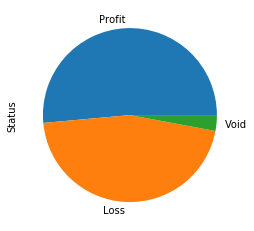

In [35]:
df.Status.value_counts().plot(kind='pie')

In [36]:
df.Asset.value_counts()

Ethereum Classic       329
EUR USD                266
GBP USD                257
Basic Altcoin Index    227
Zcash                  176
Ethereum               137
Dash                   117
Google                 102
Bitcoin                100
Ripple                  98
DAX                     69
Facebook                53
Basic Dollar Index      48
NASDAQ                  27
AUD JPY                 24
AUD CAD                 21
Dow Jones               19
EUR AUD                 19
Gold                    18
EUR NZD                 18
GBP NZD                 17
GBP AUD                 14
NZD JPY                 12
Nikkei 225              11
EUR GBP                  9
CHF JPY                  9
USD NOK                  8
AUD CHF                  6
FTSE 100                 6
GBP USD OTC              6
Gold OTC                 5
Litecoin                 5
USD JPY                  5
EUR JPY                  4
CAD CHF                  4
NZD CAD                  4
AUD NZD                  4
G

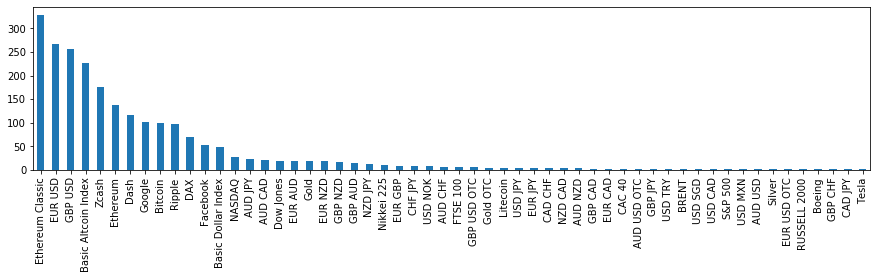

In [37]:
plt.figure(figsize=(15,3))
df.Asset.value_counts().plot(kind='bar')

In [38]:
grouped = df.groupby(['Asset']).agg(
    {
        'Income_USD': sum,
        'Profit_Loss': sum,
        'Status': "count"
    }
)

In [39]:
grouped.sort_values(by=['Profit_Loss'], ascending=False) #Status included for count (total no of occurance of a particular asset)

,Income_USD,Profit_Loss,Status
Asset,,,
Ethereum Classic,1331.16,114.16,329
Facebook,176.38,37.38,53
Google,556.21,34.21,102
Basic Dollar Index,129.79,17.79,48
Dow Jones,60.71,11.71,19
RUSSELL 2000,18.00,8.00,1
Ethereum,353.90,6.90,137
EUR GBP,25.81,5.81,9
EUR JPY,9.04,4.04,4


In [40]:
# group = df.loc[df['Asset'] == 'Ethereum Classic'].groupby(["Status"]).count()

In [41]:
# Define the aggregation calculations
aggregations = {
    'Income_USD': { 
        'total_income': 'sum',  
        'average_income': 'mean', 
        'num_of_times': 'count'
    },
    'Income_USD': { 
        'total_income': 'sum',  
        'average_income': 'mean', 
        'num_of_times': 'count'
    },
    'Status': ["count"] 
}
# Perform groupby aggregation by "month", 
# but only on the rows that are of type "call"
grouped = df.groupby('Asset').agg(aggregations)

D:\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [42]:
grouped

Income_USD                             Status
                    total_income average_income num_of_times  count
Asset                                                              
AUD CAD                    19.71       0.938571           21     21
AUD CHF                     2.28       0.380000            6      6
AUD JPY                    50.62       2.109167           24     24
AUD NZD                     7.26       1.815000            4      4
AUD USD                     1.80       1.800000            1      1
AUD USD OTC                 0.93       0.465000            2      2
BRENT                       1.80       0.900000            2      2
Basic Altcoin Index       776.10       3.418943          227    227
Basic Dollar Index        129.79       2.703958           48     48
Bitcoin                   280.39       2.803900          100    100
Boeing                      0.00       0.000000            1      1
CAC 40                      5.40       1.800000            3      3
CAD CHF                     3.64       0.910000            4      4
CAD JPY                     1.80       1.800000            1      1
CHF JPY                    13.92       1.546667            9      9
DAX                       163.04       2.362899           69     69
Dash                      200.52       1.713846          117    117
Dow Jones                  60.71       3.195263           19     19
EUR AUD                    36.73       1.933158           19     19
EUR CAD                     2.41       0.803333            3      3
EUR GBP                    25.81       2.867778            9      9
EUR JPY                     9.04       2.260000            4      4
EUR NZD                    19.86       1.103333           18     18
EUR USD                   367.55       1.381767          266    266
EUR USD OTC                 0.00       0.000000            1      1
Ethereum                  353.90       2.583212          137    137
Ethereum Classic         1331.16       4.046079          329    329
FTSE 100                    7.96       1.326667            6      6
Facebook                  176.38       3.327925           53     53
GBP AUD                    26.22       1.872857           14     14
GBP CAD                     1.34       0.446667            3      3
GBP CHF                     1.80       1.800000            1      1
GBP JPY                     1.80       0.900000            2      2
GBP NZD                    31.22       1.836471           17     17
GBP USD                   409.57       1.593658          257    257
GBP USD OTC                 6.22       1.036667            6      6
Gold                       27.52       1.528889           18     18
Gold OTC                    5.07       1.014000            5      5
Google                    556.21       5.453039          102    102
Litecoin                    9.26       1.852000            5      5
NASDAQ                     49.03       1.815926           27     27
NZD CAD                     5.40       1.350000            4      4
NZD JPY                    14.04       1.170000           12     12
Nikkei 225                  7.32       0.665455           11     11
RUSSELL 2000               18.00      18.000000            1      1
Ripple                    269.76       2.752653           98     98
S&P 500                     0.00       0.000000            2      2
Silver                      1.22       1.220000            1      1
Tesla                       0.83       0.830000            1      1
USD CAD                     1.80       0.900000            2      2
USD JPY                     7.14       1.428000            5      5
USD MXN                     1.80       1.800000            1      1
USD NOK                     8.84       1.105000            8      8
USD SGD                     5.74       2.870000            2      2
USD TRY                     0.36       0.180000            2      2
Zcash                     812.58       4.616932          176    176

Text(0.5, 1.0, 'Profit/Loss Distribution')

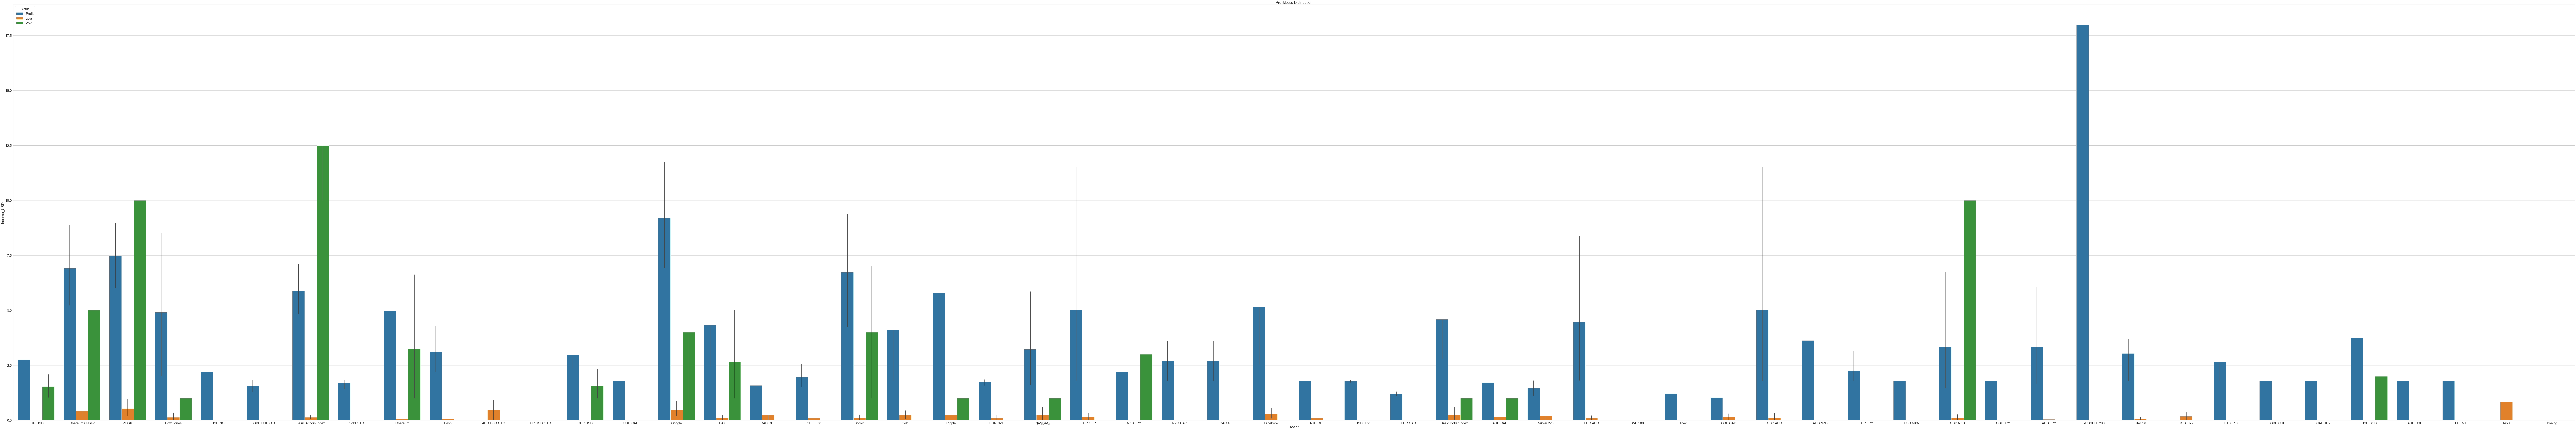

In [43]:
plt.figure(figsize=(300,50))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Asset", y="Income_USD", hue="Status", data=df)
plt.xlabel("Asset")
plt.ylabel("Income_USD")
plt.title("Profit/Loss Distribution")

In [44]:
df.Options.value_counts(normalize=True) * 100

80.0     62.860892
82.0     23.709536
100.0     1.399825
98.0      0.787402
20.0      0.743657
           ...    
81.0      0.043745
58.0      0.043745
26.0      0.043745
99.0      0.043745
46.0      0.043745
Name: Options, Length: 64, dtype: float64

In [45]:
df.Income_USD.value_counts()

0.00     811
1.80     360
1.82     202
18.00     83
3.60      56
        ... 
0.40       1
1.91       1
19.80      1
3.80       1
3.12       1
Name: Income_USD, Length: 280, dtype: int64

In [46]:
df.Trade_USD.value_counts()

1     1576
10     228
2      203
5       96
3       88
20      39
15      19
4       14
30       7
8        6
6        5
25       1
9        1
50       1
40       1
14       1
Name: Trade_USD, dtype: int64

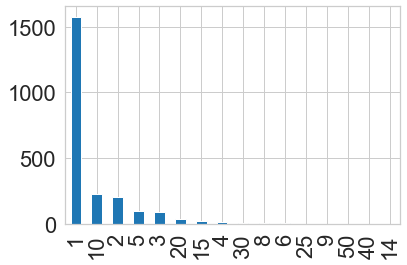

In [47]:
df.Trade_USD.value_counts().plot(kind='bar')

In [48]:
df[df.Trade_USD == 30]

,Asset,Options,Opening_Quote_USD,Opening_Quote_Time,Closing_Quote_USD,Closing_Quote_Time,Trade_USD,Income_USD,Profit_Loss,Status
657,Ethereum Classic,80.0,12.18864,2020-02-13 03:29:08,12.18617,2020-02-13 03:29:44,30,11.7,-18.3,Loss
917,Basic Altcoin Index,80.0,5.95563,2020-01-22 03:21:22,5.95929,2020-01-22 03:22:22,30,0.0,-30.0,Loss
940,Ethereum Classic,80.0,8.71287,2020-01-22 01:20:48,8.72350,2020-01-22 01:29:48,30,54.0,24.0,Profit
1223,Ethereum Classic,80.0,5.39670,2020-01-13 18:04:36,5.40641,2020-01-13 18:13:36,30,54.0,24.0,Profit
1274,Ethereum Classic,10.0,5.52608,2020-01-13 04:37:08,5.52669,2020-01-13 04:38:08,30,33.0,3.0,Profit
1312,Ethereum Classic,76.0,5.65300,2020-01-12 03:35:14,5.58354,2020-01-12 03:44:14,30,0.0,-30.0,Loss
1319,Bitcoin,80.0,8156.72600,2020-01-12 03:00:19,8156.72400,2020-01-12 03:01:19,30,0.0,-30.0,Loss


In [49]:
df.Income_USD.describe()

count    2286.000000
mean        2.769291
std         6.024202
min         0.000000
25%         0.000000
50%         1.260000
75%         1.820000
max        90.000000
Name: Income_USD, dtype: float64

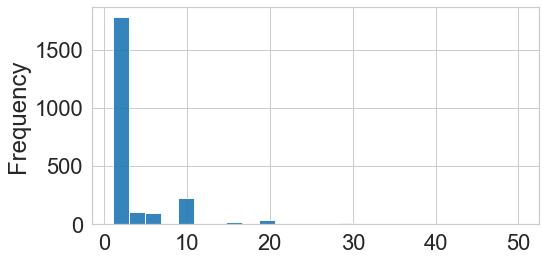

In [50]:
# df.Trade_USD.plot(kind="hist")
df.Trade_USD.plot.hist(bins=25, alpha=0.9, figsize=(8,4))

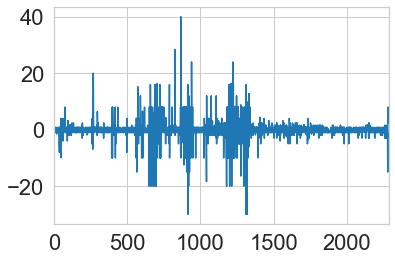

In [51]:
df.Profit_Loss.plot(kind="line")

In [52]:
# sns.pairplot(df)

In [53]:
df.corr()

,Options,Opening_Quote_USD,Closing_Quote_USD,Trade_USD,Income_USD,Profit_Loss
Options,1.000000,0.000488,0.000485,-0.043167,-0.027113,0.005032
Opening_Quote_USD,0.000488,1.000000,0.999999,-0.001707,-0.004355,-0.004593
Closing_Quote_USD,0.000485,0.999999,1.000000,-0.001703,-0.004336,-0.004570
Trade_USD,-0.043167,-0.001707,-0.001703,1.000000,0.728786,0.030429
Income_USD,-0.027113,-0.004355,-0.004336,0.728786,1.000000,0.706601
Profit_Loss,0.005032,-0.004593,-0.004570,0.030429,0.706601,1.000000


In [54]:
df.corr()

,Options,Opening_Quote_USD,Closing_Quote_USD,Trade_USD,Income_USD,Profit_Loss
Options,1.000000,0.000488,0.000485,-0.043167,-0.027113,0.005032
Opening_Quote_USD,0.000488,1.000000,0.999999,-0.001707,-0.004355,-0.004593
Closing_Quote_USD,0.000485,0.999999,1.000000,-0.001703,-0.004336,-0.004570
Trade_USD,-0.043167,-0.001707,-0.001703,1.000000,0.728786,0.030429
Income_USD,-0.027113,-0.004355,-0.004336,0.728786,1.000000,0.706601
Profit_Loss,0.005032,-0.004593,-0.004570,0.030429,0.706601,1.000000


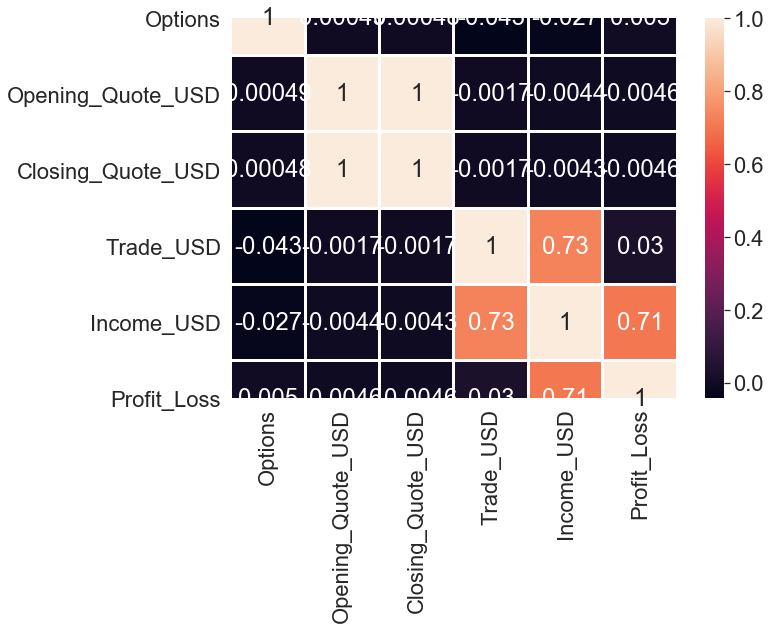

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)